In [1]:
from huggingface_hub import notebook_login
from datasets import load_dataset
from transformers import AutoImageProcessor
from transformers import pipeline

In [2]:
notebook_login()

## Load food dataset

In [3]:
ds = load_dataset("food101", split="validation[:5000]")

/home/the-iron-ryan/.conda/envs/hugging-face-playground/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


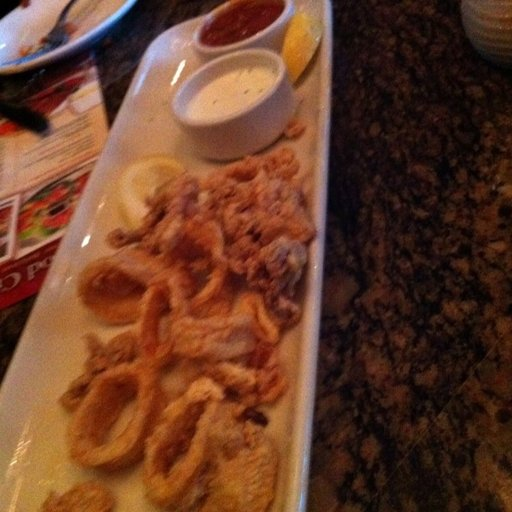

In [4]:
image = ds["image"][4000]
image

## Load specialized food classifier

In [5]:

food_classifier = pipeline(
    "image-classification", model="Shresthadev403/food-image-classification"
)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


In [6]:
food_classifier(image)

[{'label': 'fried_calamari', 'score': 0.9999847412109375},
 {'label': 'gyoza', 'score': 0.9383930563926697},
 {'label': 'oysters', 'score': 0.9296786189079285},
 {'label': 'chicken_wings', 'score': 0.928188681602478},
 {'label': 'nachos', 'score': 0.9127926230430603}]

## Load Google's general VIT model

In [7]:
googles_classifier = pipeline(
    "image-classification", model="google/vit-base-patch16-224"
)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cpu


In [8]:
googles_classifier(image)

[{'label': 'plate', 'score': 0.37037843465805054},
 {'label': 'pretzel', 'score': 0.09214987605810165},
 {'label': 'hot pot, hotpot', 'score': 0.0744924545288086},
 {'label': 'tray', 'score': 0.055320776998996735},
 {'label': 'consomme', 'score': 0.02635307051241398}]